---
title: "Practicum Process Technology - Lorentz System"
author: "Mattia Galanti"
update: "10/11/2025"
---

Lorentz system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.lines import Line2D

# 1) Define the Lorenz system of equations
def lorenz_system(t, y, Pr, Ra, beta):
    x, y, z = y
    dx = Pr * (y - x)
    dy = x * (Ra - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

# 2) Set parameters and initial conditions
sigma = 10.0
rho   = 20
beta  = 8.0 / 3.0

y0   = np.array([1.0, 1.0, 1.0])
eps  = 1e-6
y0_2 = y0 + np.array([eps, 0.0, 0.0])

t_span = (0.0, 50.0)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Choose a method: "RK45", "LSODA", "BDF"
method = "RK45"          

# 3) Solve the system for both initial conditions
sol1 = solve_ivp(lorenz_system, t_span, y0,   args=(sigma, rho, beta), t_eval=t_eval, method=method, rtol=1e-9, atol=1e-12)
sol2 = solve_ivp(lorenz_system, t_span, y0_2, args=(sigma, rho, beta), t_eval=t_eval, method=method, rtol=1e-9, atol=1e-12)

t = sol1.t
X1, Y1, Z1 = sol1.y
X2, Y2, Z2 = sol2.y


Time solutions plots

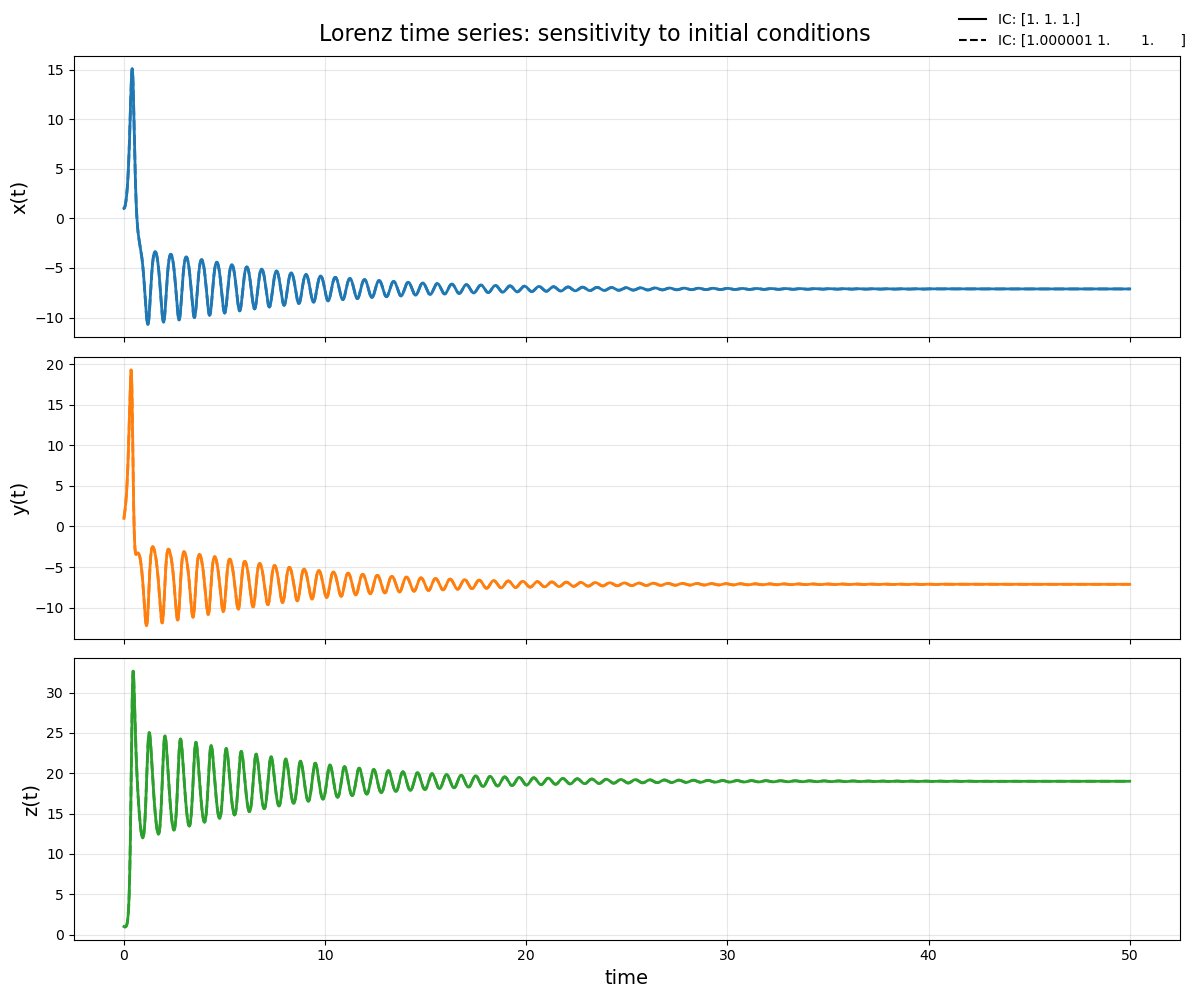

In [2]:
# ----- Plot time series: 3x1 -----
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

colors = {"x":"tab:blue", "y":"tab:orange", "z":"tab:green"}

# x(t)
axes[0].plot(t, X1, color=colors["x"], lw=2)
axes[0].plot(t, X2, color=colors["x"], lw=2, ls="--")
axes[0].set_ylabel("x(t)", fontsize=14)
axes[0].grid(alpha=0.3)

# y(t)
axes[1].plot(t, Y1, color=colors["y"], lw=2)
axes[1].plot(t, Y2, color=colors["y"], lw=2, ls="--")
axes[1].set_ylabel("y(t)", fontsize=14)
axes[1].grid(alpha=0.3)

# z(t)
axes[2].plot(t, Z1, color=colors["z"], lw=2)
axes[2].plot(t, Z2, color=colors["z"], lw=2, ls="--")
axes[2].set_ylabel("z(t)", fontsize=14)
axes[2].set_xlabel("time", fontsize=14)
axes[2].grid(alpha=0.3)

fig.suptitle("Lorenz time series: sensitivity to initial conditions", fontsize=16)

# A clean, global legend (solid = IC1, dashed = IC2)
legend_lines = [
    Line2D([0],[0], color="black", lw=1.5, ls="-"),
    Line2D([0],[0], color="black", lw=1.5, ls="--"),
]
fig.legend(legend_lines, [f"IC: {y0}", f"IC: {y0_2}"], loc="upper right", frameon=False)

plt.tight_layout()
plt.show()


Phase space plots

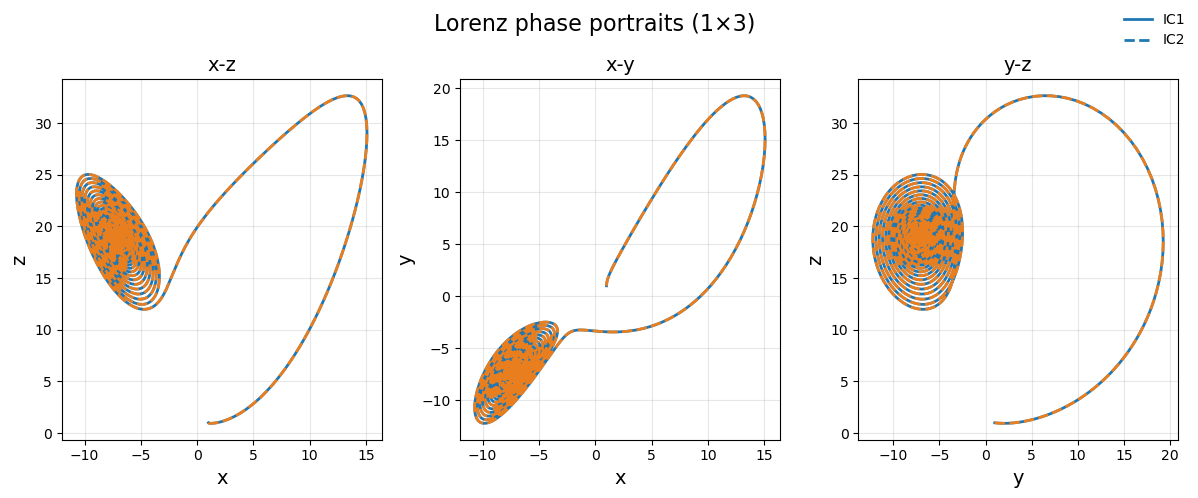

In [3]:
# --- Phase space: 1x3 subplots ---
fig_ps, ax = plt.subplots(1, 3, figsize=(12, 5), sharex=False, sharey=False)

# x–z
ax[0].plot(X1, Z1, lw=2, label="IC1")
ax[0].plot(X2, Z2, lw=2, ls="--", alpha=0.9, label="IC2")
ax[0].set_xlabel("x", fontsize=14)
ax[0].set_ylabel("z", fontsize=14)
ax[0].set_title("x-z", fontsize=14)
ax[0].grid(alpha=0.3)

# x–y
ax[1].plot(X1, Y1, lw=2, label="IC1")
ax[1].plot(X2, Y2, lw=2, ls="--", alpha=0.9, label="IC2")
ax[1].set_xlabel("x", fontsize=14)
ax[1].set_ylabel("y", fontsize=14)
ax[1].set_title("x-y", fontsize=14)
ax[1].grid(alpha=0.3)

# y–z
ax[2].plot(Y1, Z1, lw=2, label="IC1")
ax[2].plot(Y2, Z2, lw=2, ls="--", alpha=0.9, label="IC2")
ax[2].set_xlabel("y", fontsize=14)
ax[2].set_ylabel("z", fontsize=14)
ax[2].set_title("y-z", fontsize=14)
ax[2].grid(alpha=0.3)

# One global legend (solid = IC1, dashed = IC2)
handles = [Line2D([0],[0], lw=2, ls="-", label="IC1"),
           Line2D([0],[0], lw=2, ls="--", label="IC2")]
fig_ps.legend(handles=handles, loc="upper right", frameon=False)

fig_ps.suptitle("Lorenz phase portraits (1×3)", fontsize=16)
plt.tight_layout()
plt.show()